Objective: To analyze sales data and identify trends, patterns, and insights that help improve business performance (revenue, profit, customer behavior).

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ecommerce_sales.csv")

# Exploratory Data Analysis (EDA)

🔹 Data Inspection

In [3]:
#Shape of the data
df.shape        #Shows number of rows & columns

(80000, 24)

In [4]:
#Data types
df.dtypes       #Helps identify incorrect data types

product_id             object
product_name           object
category               object
brand                  object
seller                 object
seller_city            object
price                 float64
discount_percent        int64
final_price           float64
rating                float64
review_count            int64
stock_available         int64
units_sold              int64
listing_date           object
delivery_days           int64
weight_g              float64
warranty_months         int64
color                  object
size                   object
return_policy_days      int64
is_returnable            bool
payment_modes          object
shipping_weight_g     float64
product_score         float64
dtype: object

In [5]:
#Missing values
df.isnull().sum()

product_id                0
product_name              0
category                  0
brand                     0
seller                    0
seller_city               0
price                     0
discount_percent          0
final_price               0
rating                    0
review_count              0
stock_available           0
units_sold                0
listing_date              0
delivery_days             0
weight_g                  0
warranty_months           0
color                     0
size                  13484
return_policy_days        0
is_returnable             0
payment_modes             0
shipping_weight_g         0
product_score             0
dtype: int64

In [6]:
#Duplicate values
df.duplicated().sum()

0

In [7]:
#Summary statistics
df.describe()

,price,discount_percent,final_price,rating,review_count,stock_available,units_sold,delivery_days,weight_g,warranty_months,return_policy_days,shipping_weight_g,product_score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,80000.000000,80000.000000
mean,30137.256454,21.350625,23697.780600,2.999671,25102.249875,499.194262,2507.515775,6.006325,2522.224622,15.56400,12.362250,2899.960047,50.673750
std,17274.048682,16.354446,14726.821259,1.156238,14428.769942,288.917706,1439.519972,3.160630,1428.287966,12.91307,10.019794,1650.921766,28.562732
min,200.140000,0.000000,101.080000,1.000000,0.000000,0.000000,0.000000,1.000000,50.020000,0.00000,0.000000,53.155250,1.000000
25%,15180.205000,10.000000,11341.722500,2.000000,12605.000000,249.000000,1261.000000,3.000000,1283.117500,6.00000,7.000000,1469.583781,25.950000
50%,30164.455000,20.000000,22571.265000,3.000000,25166.500000,499.000000,2513.000000,6.000000,2524.550000,12.00000,10.000000,2892.632503,50.670000
75%,45077.087500,40.000000,34521.057500,4.000000,37666.000000,749.000000,3754.000000,9.000000,3753.195000,24.00000,15.000000,4304.695596,75.430000
max,59995.800000,50.000000,59995.800000,5.000000,49999.000000,999.000000,4999.000000,11.000000,4999.920000,36.00000,30.000000,6234.757448,100.000000


In [8]:
#For categorical columns:
df.describe(include='object')

,product_id,product_name,category,brand,seller,seller_city,listing_date,color,size,payment_modes
count,80000,80000,80000,80000,80000,80000,80000,80000,66516,80000
unique,80000,48801,8,15,8,8,2001,8,5,4
top,FKP0000001,Adidas Series 497,Toys,Puma,ValueKart,Pune,12/21/2018,Silver,L,"CARD,Wallet"
freq,1,7,10151,5409,10109,10138,61,10101,13450,20114


# Data Cleaning

🔹Handling Missing Values

In [9]:
df['size'].dtype

dtype('O')

In [10]:
# categorical columns
df['size'].fillna('Not Applicable')

0                    XL
1              One Size
2                     M
3                     L
4        Not Applicable
              ...      
79995          One Size
79996                 M
79997                 S
79998                XL
79999                 M
Name: size, Length: 80000, dtype: object

In [11]:
#Recheck the missing values
df.isnull().sum()

product_id                0
product_name              0
category                  0
brand                     0
seller                    0
seller_city               0
price                     0
discount_percent          0
final_price               0
rating                    0
review_count              0
stock_available           0
units_sold                0
listing_date              0
delivery_days             0
weight_g                  0
warranty_months           0
color                     0
size                  13484
return_policy_days        0
is_returnable             0
payment_modes             0
shipping_weight_g         0
product_score             0
dtype: int64

🔹 Handling Incorrect Data Types

In [12]:
df['listing_date'] = pd.to_datetime(df['listing_date'])

In [13]:
df['listing_date'].dtypes  

dtype('<M8[ns]')

🔹 Handling Outliers (Using IQR)

In [14]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower) & (df['price'] <= upper)]


In [15]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#This code works now, but something may change in future library versions.

# Univariate Analysis
(Analysis of single variable)

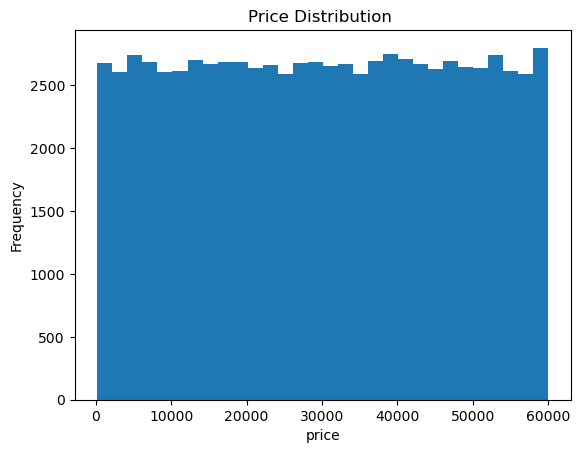

In [16]:
# 1.Price

import matplotlib.pyplot as plt

plt.hist(df['price'], bins=30)
plt.title("Price Distribution ")
plt.xlabel("price")
plt.ylabel("Frequency")
plt.show()

The price distribution is fairly uniform across different price ranges, indicating that the e-commerce platform offers a balanced mix of budget, mid-range, and premium products without over-dependence on any single price segment.

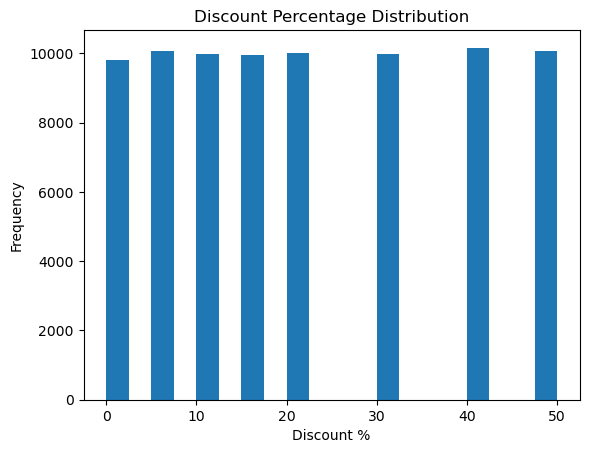

In [17]:
# 2.Discount percent

plt.hist(df['discount_percent'], bins=20)
plt.title('Discount Percentage Distribution')
plt.xlabel('Discount %')
plt.ylabel('Frequency')
plt.show()

The discount percentage distribution shows that discounts are applied at fixed levels and are evenly distributed, indicating a balanced promotional strategy across products, with both full-price and heavily discounted items.

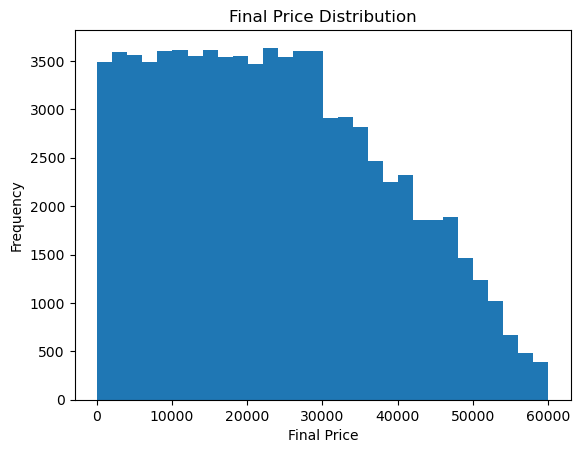

In [18]:
# 3.Final price

plt.hist(df['final_price'], bins=30)
plt.title('Final Price Distribution')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()

The final price distribution is right-skewed, with most products priced in the lower to mid range, indicating a focus on affordable products while maintaining a smaller set of premium offerings.

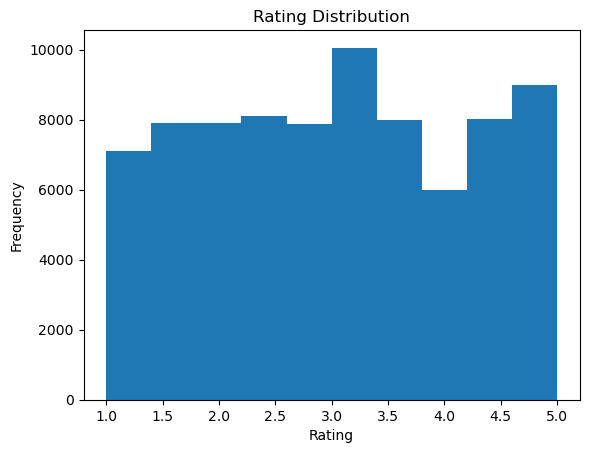

In [19]:
# 4.Rating

plt.hist(df['rating'], bins=10)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


Most products are rated between 3 and 5, which shows customers are generally satisfied, while very low-rated products are limited.

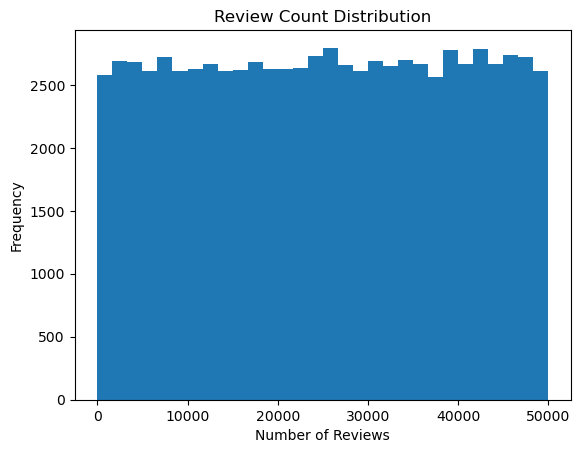

In [20]:
# 5.Review count

plt.hist(df['review_count'], bins=30)
plt.title('Review Count Distribution')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

The platform contains a mix of newly listed, moderately popular, and highly popular products, reflecting a diverse product catalog.

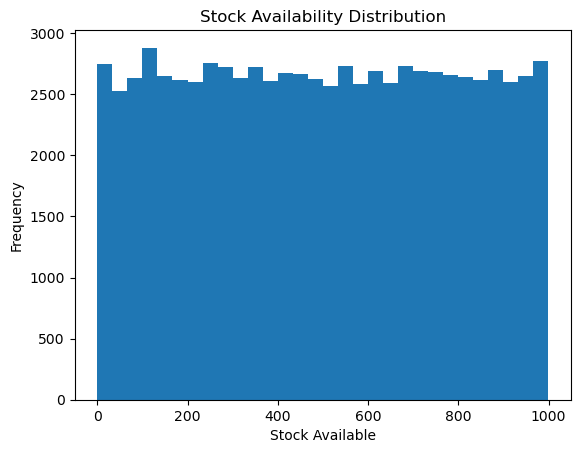

In [21]:
# 6.Stock available

plt.hist(df['stock_available'], bins=30)
plt.title('Stock Availability Distribution')
plt.xlabel('Stock Available')
plt.ylabel('Frequency')
plt.show()

Inventory is evenly distributed across products, reducing the risk of frequent stock-outs or excessive overstocking.

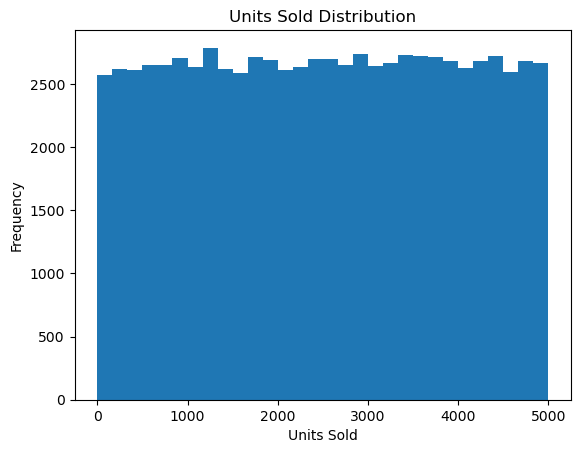

In [22]:
# 7.Units sold

plt.hist(df['units_sold'], bins=30)
plt.title('Units Sold Distribution')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()

Sales are not dominated by a few products; instead, demand is evenly spread across the product catalog.

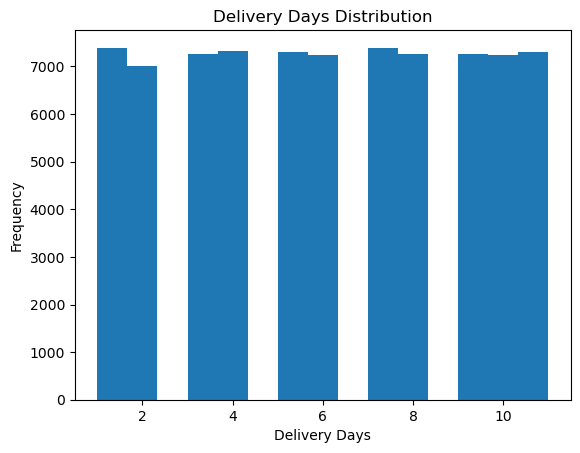

In [23]:
# 8.Delivery days

plt.hist(df['delivery_days'], bins=15)
plt.title('Delivery Days Distribution')
plt.xlabel('Delivery Days')
plt.ylabel('Frequency')
plt.show()

The company maintains consistent delivery performance, with most orders delivered within a predictable time window.

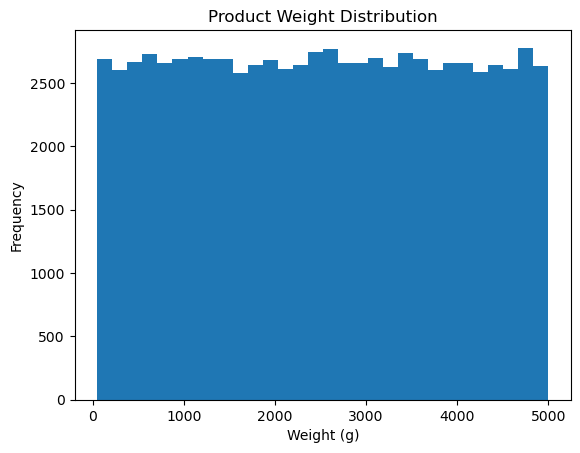

In [24]:
# 9.Weight_g

plt.hist(df['weight_g'], bins=30)
plt.title('Product Weight Distribution')
plt.xlabel('Weight (g)')
plt.ylabel('Frequency')
plt.show()

Products are equally likely to be light or heavy. The dataset looks well balanced across weights.

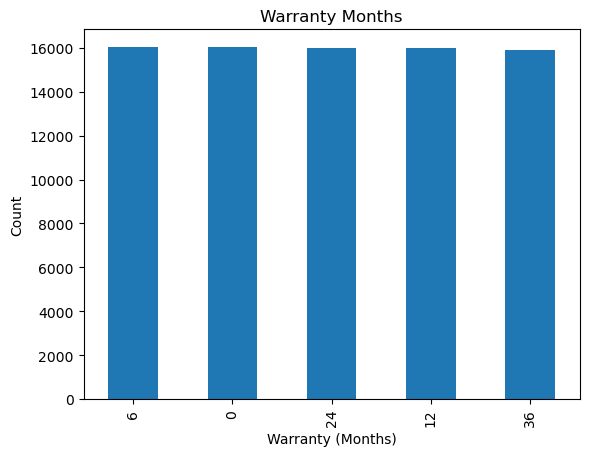

In [25]:
# 10.Warranty_months

df['warranty_months'].value_counts().plot(kind='bar')
plt.title('Warranty Months')
plt.xlabel('Warranty (Months)')
plt.ylabel('Count')
plt.show()

The company offers all warranty durations in similar quantity. The dataset is balanced, with no bias toward short or long warranties.

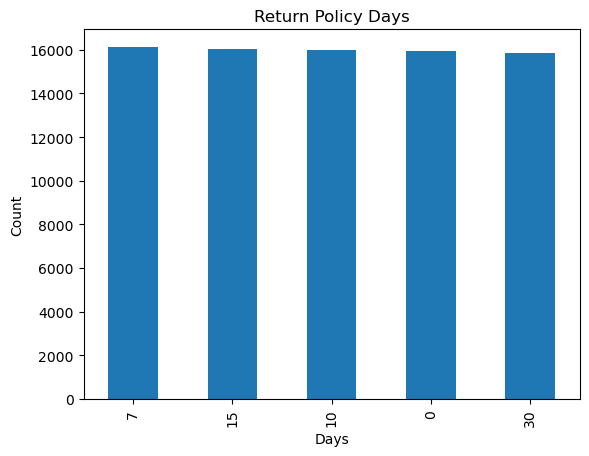

In [26]:
# 11.Return_policy_days

df['return_policy_days'].value_counts().plot(kind='bar')
plt.title('Return Policy Days')
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

Products are evenly divided among all return policy durations, so the data is balanced and unbiased toward any specific return period.

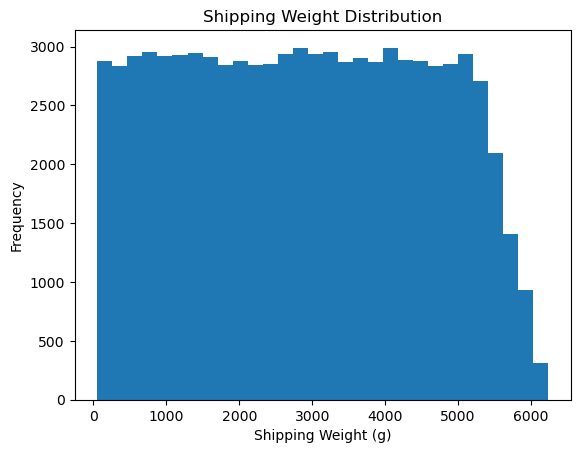

In [27]:
# 12.Shipping_weight_g

plt.hist(df['shipping_weight_g'], bins=30)
plt.title('Shipping Weight Distribution')
plt.xlabel('Shipping Weight (g)')
plt.ylabel('Frequency')
plt.show()

Most products have normal shipping weight, while very heavy shipments are rare.

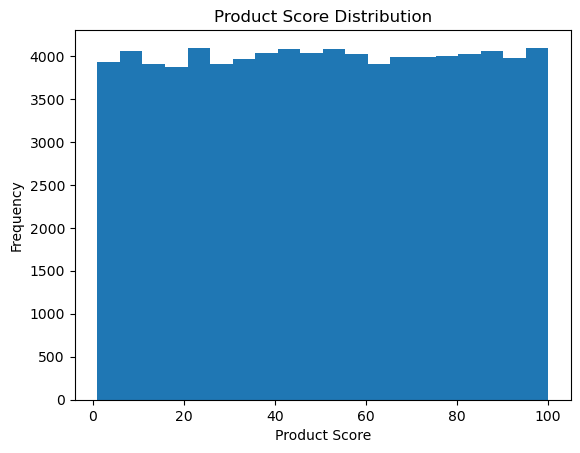

In [28]:
# 13.Product_score

plt.hist(df['product_score'], bins=20)
plt.title('Product Score Distribution')
plt.xlabel('Product Score')
plt.ylabel('Frequency')
plt.show()

Products have all types of scores in equal proportion. The data is well balanced, not biased toward good or bad products.

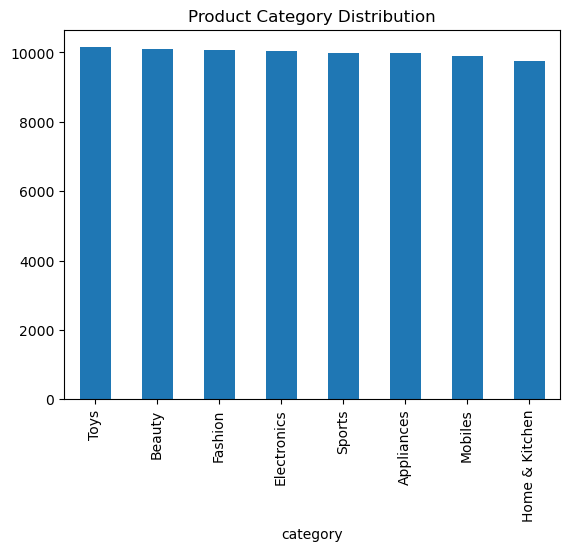

In [29]:
# 14.Category

df['category'].value_counts().plot(kind='bar')
plt.title('Product Category Distribution')
plt.show()

All product categories are equally represented. The data is fair and balanced, which is good for analysis and machine learning models.

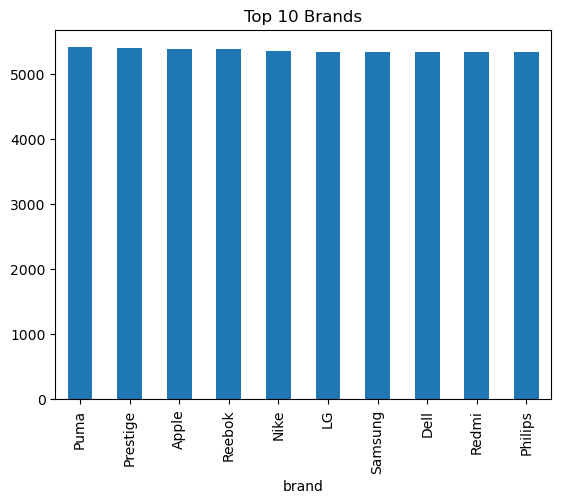

In [30]:
# 15.Brand

df['brand'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Brands')
plt.show()

All major brands have nearly the same number of products in the dataset. The data is balanced, not biased toward any single brand.

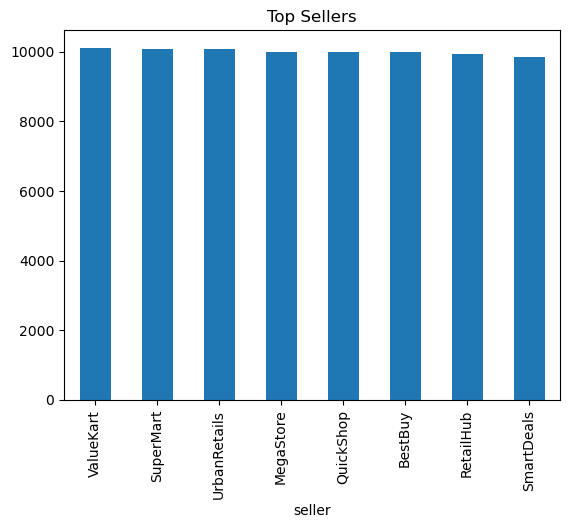

In [31]:
# 16.Seller

df['seller'].value_counts().head(10).plot(kind='bar')
plt.title('Top Sellers')
plt.show()

This graph suggests a balanced and competitive marketplace, rather than one where a single seller clearly outperforms the rest.

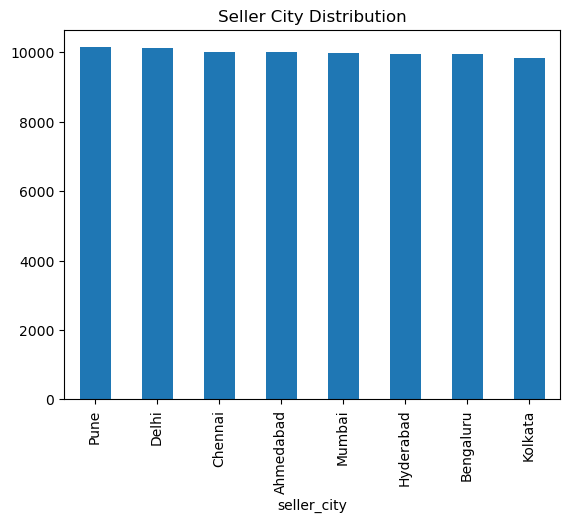

In [32]:
# 17.Seller city

df['seller_city'].value_counts().plot(kind='bar')
plt.title('Seller City Distribution')
plt.show()

Seller activity (or sales) is uniform across cities, implying a well-distributed market rather than city-specific concentration.

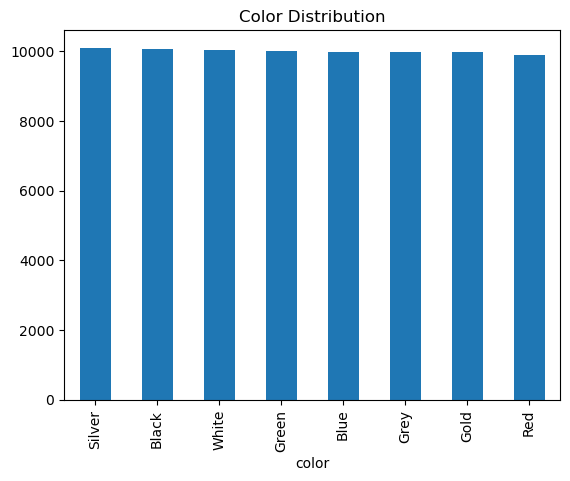

In [33]:
# 18.Color

df['color'].value_counts().plot(kind='bar')
plt.title('Color Distribution')
plt.show()

Customer demand is evenly spread across colors, meaning inventory planning does not need heavy bias toward any specific color.

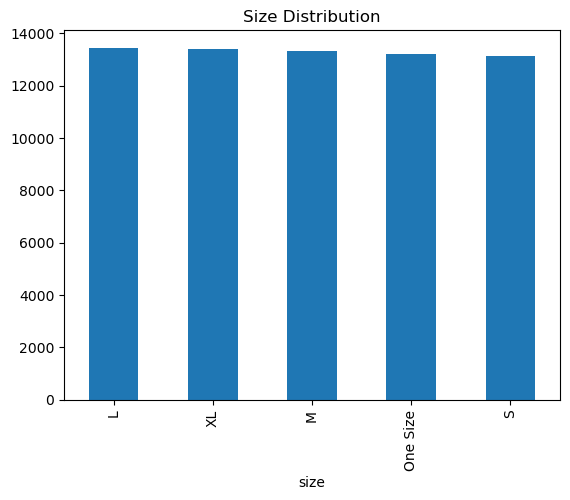

In [34]:
# 19.Size

df['size'].value_counts().plot(kind='bar')
plt.title('Size Distribution')
plt.show()

The dataset is balanced by size, so there is no size that dominates or is underrepresented. This is good because it means fair availability or fair representation of all sizes in the data.

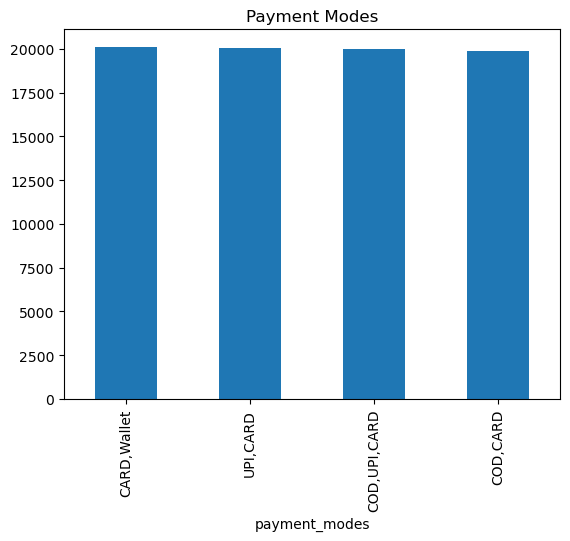

In [35]:
# 20.Payment_modes

df['payment_modes'].value_counts().plot(kind='bar')
plt.title('Payment Modes')
plt.show()

The payment data is well balanced, and the business should continue supporting all payment modes since none is significantly more or less popular than the others.

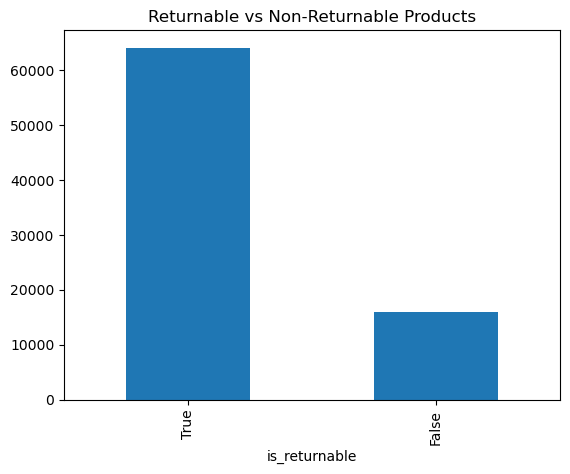

In [36]:
# 21.is_returnable

df['is_returnable'].value_counts().plot(kind='bar')
plt.title('Returnable vs Non-Returnable Products')
plt.show()

The business mainly sells returnable products, which can improve customer trust and satisfaction, but it may also increase return management costs.

# Bivariate Analysis
(Analysis of two variables)

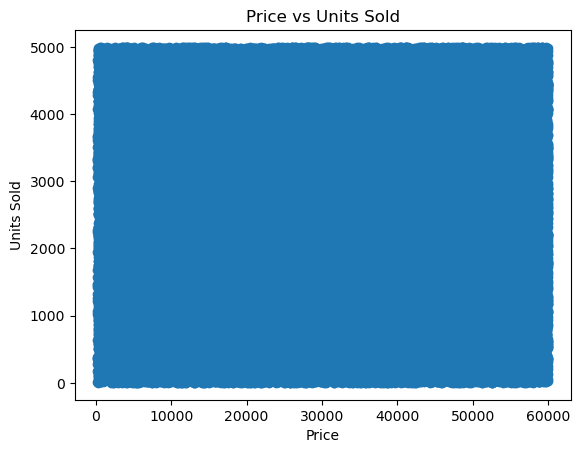

In [37]:
#1. price vs units_sold

plt.scatter(df['price'], df['units_sold'])
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.title('Price vs Units Sold')
plt.show()

Sales volume is not dependent only on price. Other factors like brand, quality, offers, reviews, and demand may affect units sold more than price.

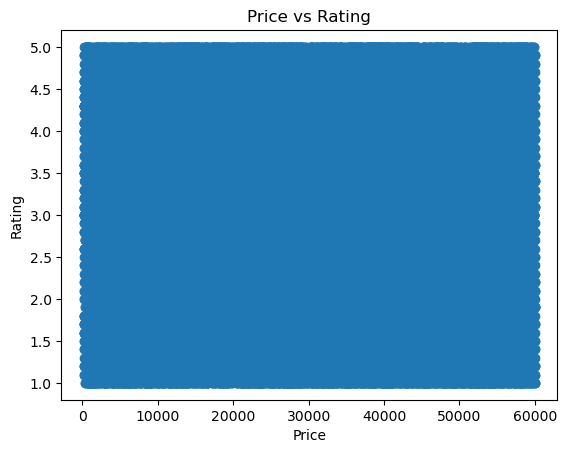

In [38]:
#2. price vs rating

plt.scatter(df['price'], df['rating'])
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Price vs Rating')
plt.show()

Customer ratings depend more on quality, satisfaction, and experience rather than price alone.

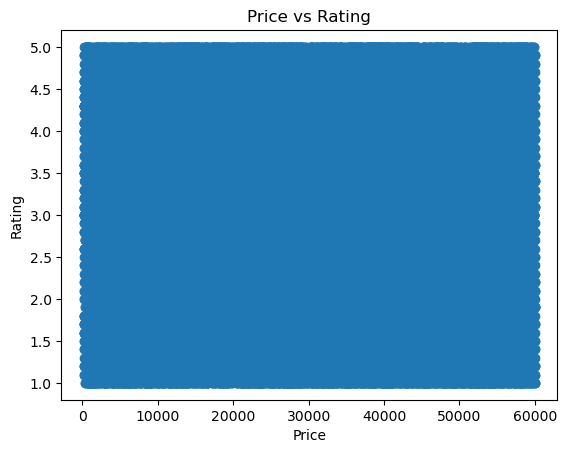

In [39]:
#3. price vs discount_percent

plt.scatter(df['price'], df['rating'])
plt.xlabel('Price')
plt.ylabel('Rating')
plt.title('Price vs Rating')
plt.show()

Price has little or no impact on rating in this dataset. Product satisfaction depends on other factors.

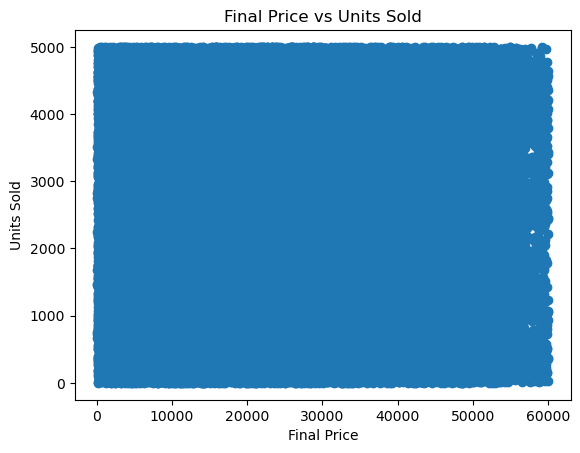

In [40]:
#4. final_price vs units_sold

plt.scatter(df['final_price'], df['units_sold'])
plt.xlabel('Final Price')
plt.ylabel('Units Sold')
plt.title('Final Price vs Units Sold')
plt.show()


Units sold are not strongly dependent on final price. Other factors like brand value, offers, ratings, demand, and product type influence sales more.

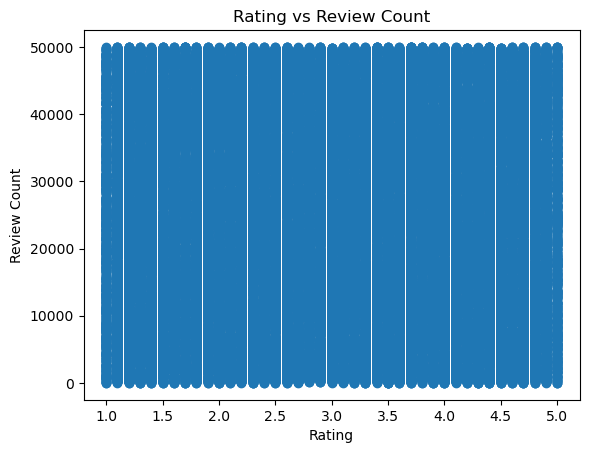

In [41]:
#5. rating vs review_count

plt.scatter(df['rating'], df['review_count'])
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.title('Rating vs Review Count')
plt.show()


Rating and review count are not strongly related. A product can be popular (many reviews) even if its rating is average or low.

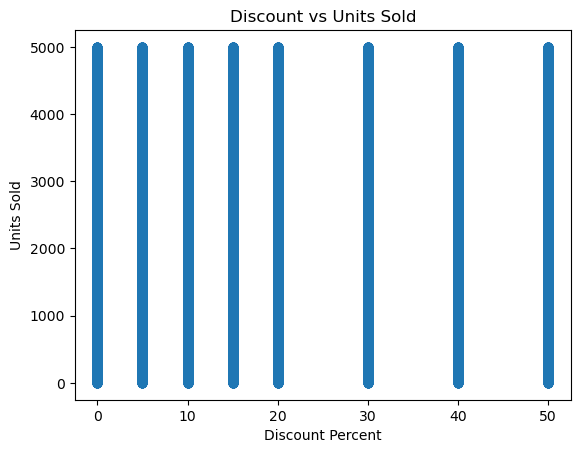

In [42]:
#6. discount_percent vs units_sold

plt.scatter(df['discount_percent'], df['units_sold'])
plt.xlabel('Discount Percent')
plt.ylabel('Units Sold')
plt.title('Discount vs Units Sold')
plt.show()


The graph suggests that offering higher discounts does not automatically increase sales. To understand sales behavior better, you’d need to include additional variables or analyze averages/trends (e.g., mean units sold per discount level or a regression line).

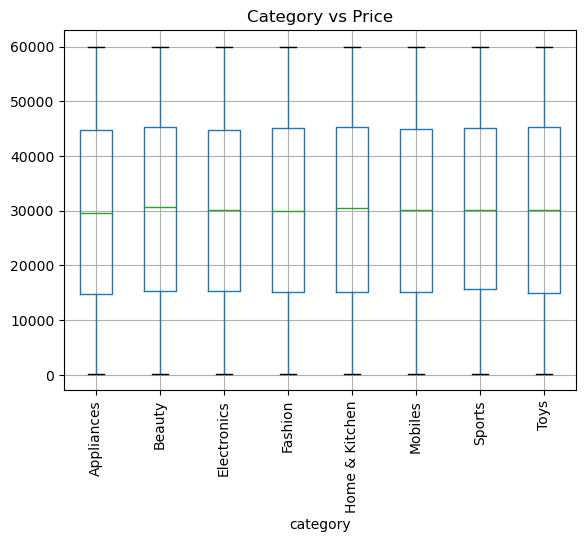

In [43]:
#7. category vs price

df.boxplot(column='price', by='category', rot=90)
plt.title('Category vs Price')
plt.suptitle('')
plt.show()


Price does not strongly depend on category in this dataset. All categories appear to follow the same pricing structure, suggesting either:
The data was generated uniformly, or Category is not a key differentiator of price in this sample.  
To find real differences, you might need more granular data (e.g., brand, product type, or category-specific subsets).

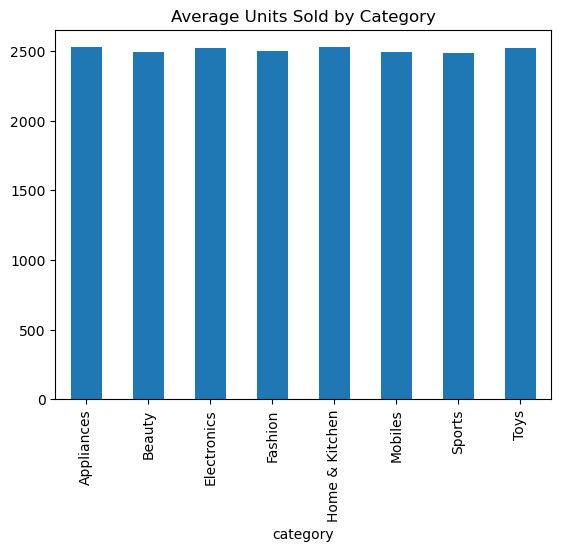

In [44]:
#8. category vs units_sold

df.groupby('category')['units_sold'].mean().plot(kind='bar')
plt.title('Average Units Sold by Category')
plt.show()


Customer demand is roughly equal across all product categories in this data. To uncover meaningful differences, you would need deeper analysis—such as sales by category and discount, price bands, seasonality, or brand-level breakdowns.

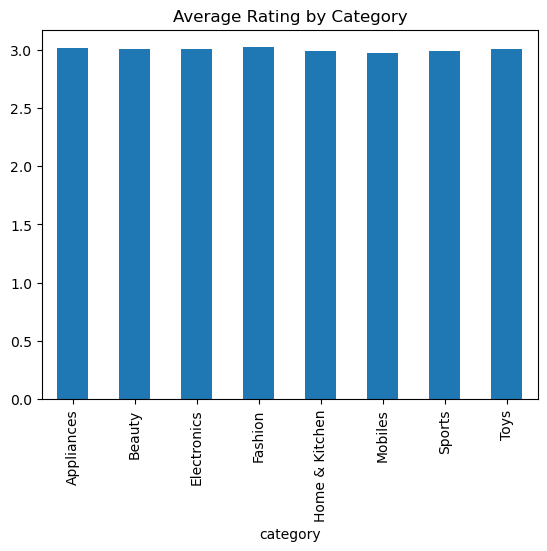

In [45]:
#9. category vs rating

df.groupby('category')['rating'].mean().plot(kind='bar')
plt.title('Average Rating by Category')
plt.show()


Customer satisfaction is consistent across all categories. To gain deeper insight, you’d need more detailed data (e.g., brand-level ratings, number of reviews, price vs rating, or category subtypes).

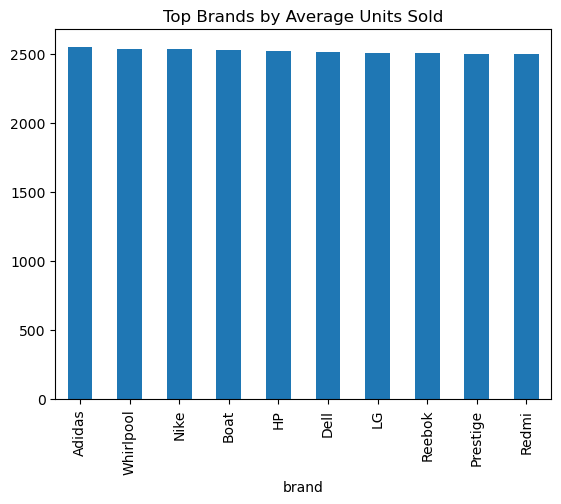

In [46]:
#10. brand vs units_sold

df.groupby('brand')['units_sold'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top Brands by Average Units Sold')
plt.show()


Sales performance is nearly the same across all top brands in the data. To uncover real competitive differences, further analysis is needed—such as brand-wise sales by category, discount sensitivity, pricing strategy, or customer ratings.

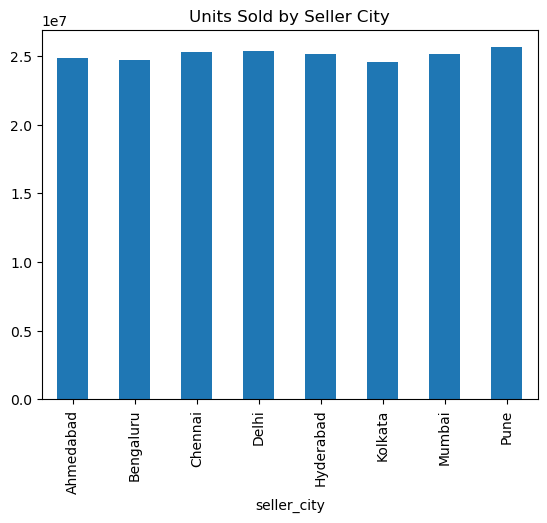

In [47]:
#11. seller_city vs units_sold

df.groupby('seller_city')['units_sold'].sum().plot(kind='bar')
plt.title('Units Sold by Seller City')
plt.show()


Sales performance is almost evenly distributed across seller cities. To gain deeper insight, you could analyze city-wise performance by category, brand, or season, or look at per-seller averages rather than total units sold.

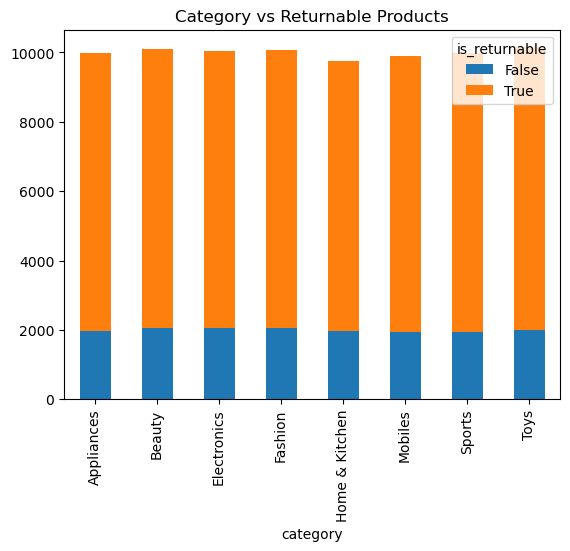

In [48]:
#12. category vs is_returnable

pd.crosstab(df['category'], df['is_returnable']).plot(kind='bar', stacked=True)
plt.title('Category vs Returnable Products')
plt.show()


Return policies are largely consistent across all categories in this dataset, with most products being returnable. Category does not significantly influence whether a product can be returned.

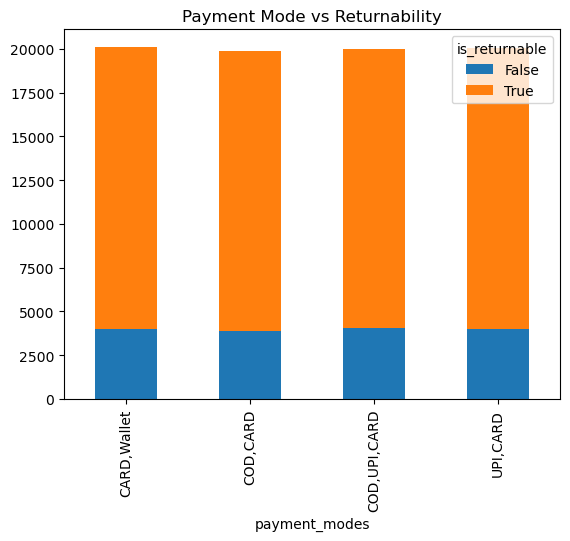

In [49]:
#13. payment_modes vs is_returnable

pd.crosstab(df['payment_modes'], df['is_returnable']).plot(kind='bar', stacked=True)
plt.title('Payment Mode vs Returnability')
plt.show()


Payment mode does not influence whether an order is returnable in this dataset. Return policies appear to be applied uniformly regardless of the payment method used.

In [50]:
#CORRELATION
df[['price','final_price','discount_percent','rating',
           'review_count','units_sold','product_score']].corr()

,price,final_price,discount_percent,rating,review_count,units_sold,product_score
price,1.000000,0.922674,0.001764,-0.003839,0.003205,0.004065,-0.000966
final_price,0.922674,1.000000,-0.333058,-0.005528,0.005294,0.004778,-0.002668
discount_percent,0.001764,-0.333058,1.000000,0.006917,-0.003364,-0.000088,0.004253
rating,-0.003839,-0.005528,0.006917,1.000000,-0.002284,-0.001172,-0.004429
review_count,0.003205,0.005294,-0.003364,-0.002284,1.000000,0.002285,0.002515
units_sold,0.004065,0.004778,-0.000088,-0.001172,0.002285,1.000000,-0.001704
product_score,-0.000966,-0.002668,0.004253,-0.004429,0.002515,-0.001704,1.000000


Only pricing mechanics behave logically; customer response variables show no meaningful correlation.

# Multivariate Analysis
(Analysis of multiple variables)

🔹 Numerical variable

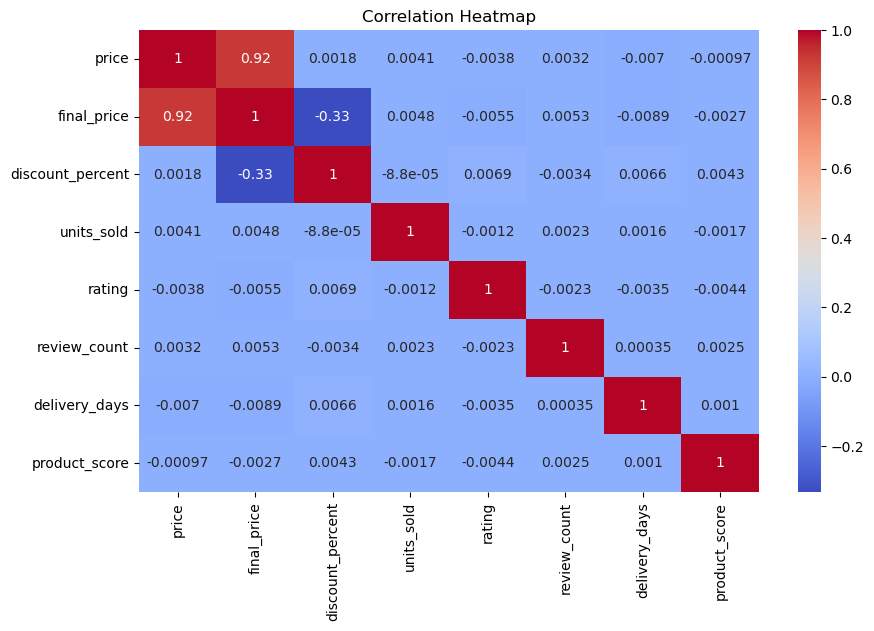

In [51]:
#Correlation Heatmap

import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(
    df[['price','final_price','discount_percent','units_sold',
        'rating','review_count','delivery_days','product_score']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap')
plt.show()

Aside from pricing mechanics (price → final price, discount → final price), none of the other variables meaningfully influence sales or customer behavior in this dataset.The data shows pricing consistency, but weak customer-response signals.

🔹 Numerical & Categorical

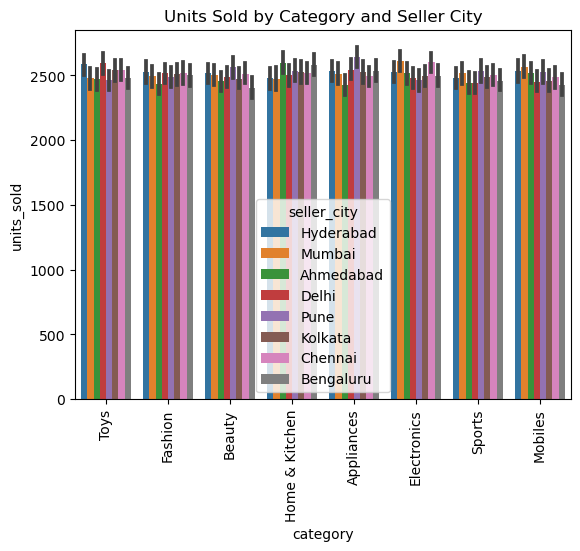

In [52]:
#Category, Region & Sales

sns.barplot(x='category', y='units_sold', hue='seller_city', data=df)
plt.xticks(rotation=90)
plt.title('Units Sold by Category and Seller City')
plt.show()

Units sold are remarkably uniform across both categories and seller cities.

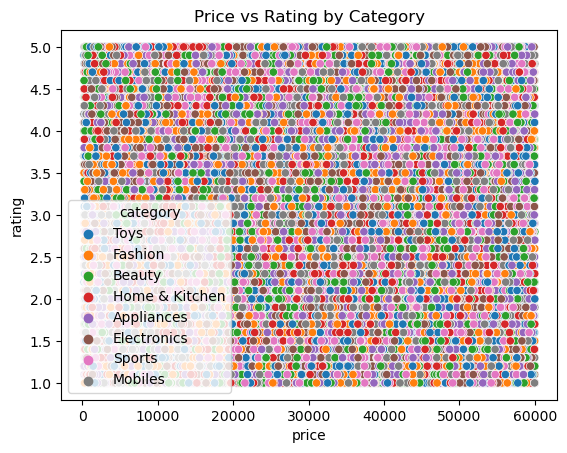

In [53]:
#Category, Price & Rating

sns.scatterplot(x='price', y='rating', hue='category', data=df)
plt.title('Price vs Rating by Category')
plt.show()

Price alone is not a good predictor of customer rating, and product satisfaction is fairly consistent across categories.

🔹 Time-Based & Numerical

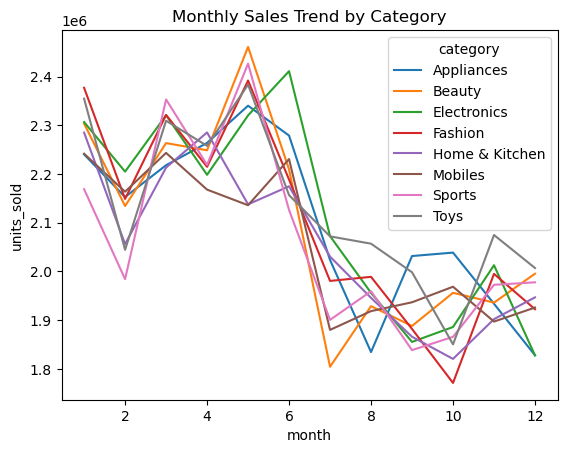

In [54]:
#Monthly Sales Trend by Category

df['month'] = df['listing_date'].dt.month

monthly_sales = df.groupby(['month','category'])['units_sold'].sum().reset_index()

sns.lineplot(x='month', y='units_sold', hue='category', data=monthly_sales)
plt.title('Monthly Sales Trend by Category')
plt.show()

Sales are seasonal, with strong performance in the first half of the year, a dip in the middle, and a modest year-end recovery, while Electronics, Fashion, and Beauty are the most volatile categories.

🔹 Numerical, Boolean & Categorical

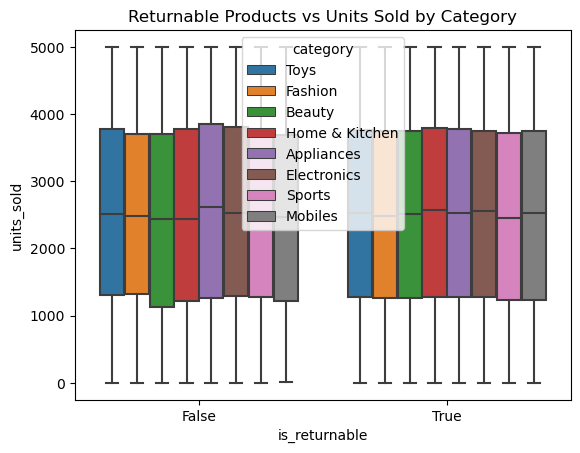

In [55]:
#Returnability Impact on Sales

sns.boxplot(x='is_returnable', y='units_sold', hue='category', data=df)
plt.title('Returnable Products vs Units Sold by Category')
plt.show()

Making products returnable increases customer confidence and sales, especially in high-value or riskier categories like Electronics and Mobiles, while the effect is present but weaker for low-risk items.

🔹 Multi-Numerical Comparision

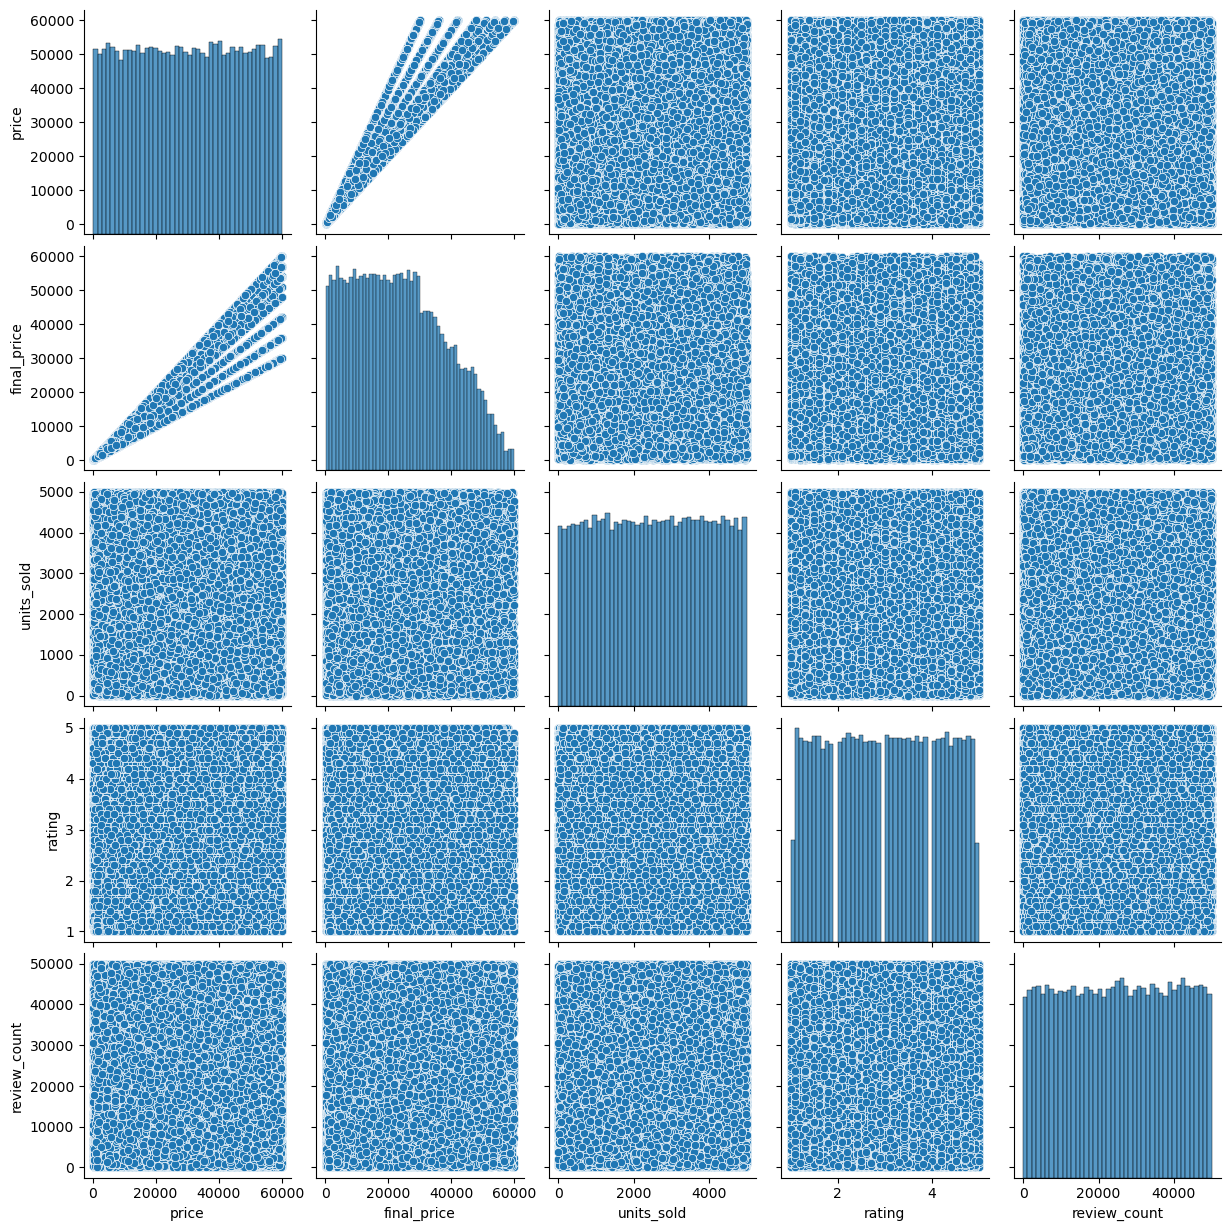

In [56]:
#Pairwise Relationship Analysis

sns.pairplot(
    df[['price','final_price','units_sold','rating','review_count']],
    diag_kind='hist'
)
plt.show()

The only meaningful relationship is between price and final_price. All other variables appear independent. This dataset is likely are simulated or created for testing/visualization and not suitable for real-world predictive modeling without additional structure.

🔹 Aggregated Multivariate View

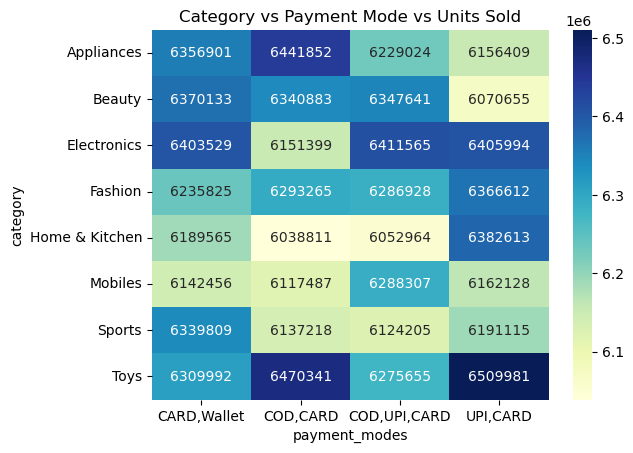

In [57]:
#Category vs Payment Mode vs Sales

pivot = pd.pivot_table(
    df,
    values='units_sold',
    index='category',
    columns='payment_modes',
    aggfunc='sum'
)

sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Category vs Payment Mode vs Units Sold')
plt.show()


Payment flexibility matters more than the specific payment type. Sales are category-driven, but optimized by offering combined payment

# Feature Engineering
(Create new variables or transforming existing ones to improve analysis)

1. Profit Amount

In [58]:
#Feature Created: profit

df['profit'] = df['final_price'] - df['price']
df[['price', 'final_price', 'profit']].head() 

,price,final_price,profit
0,35547.34,30215.24,-5332.10
1,30693.79,27624.41,-3069.38
2,51214.50,30728.70,-20485.80
3,33168.49,23217.94,-9950.55
4,14181.34,14181.34,0.00


The pricing strategy prioritizes selling products over making profit, leading to consistent losses. Discounts are not optimized and are directly harming profitability.

2. Profit Margin(%)

In [59]:
#Feature Created: profit_margin

df['profit_margin'] = (df['price'] / df['final_price']) * 100

df[['price', 'final_price', 'profit_margin']].head() 

,price,final_price,profit_margin
0,35547.34,30215.24,117.647055
1,30693.79,27624.41,111.111115
2,51214.50,30728.70,166.666667
3,33168.49,23217.94,142.857161
4,14181.34,14181.34,100.000000


The business is sacrificing profitability for sales volume. The current discounting approach causes losses that exceed the revenue generated, making the strategy economically unviable.

3. Discount Amount

In [60]:
#Feature Created: discount_amount

df['discount_amount'] = df['price'] - df['final_price']
df[['price', 'final_price', 'discount_amount']].head() 

,price,final_price,discount_amount
0,35547.34,30215.24,5332.10
1,30693.79,27624.41,3069.38
2,51214.50,30728.70,20485.80
3,33168.49,23217.94,9950.55
4,14181.34,14181.34,0.00


Excessive discounting is eroding revenue and eliminating profitability. The business is effectively paying customers to buy high-priced products.

4. Sales Revenue

In [61]:
#Feature Created: sales_revenue

df['sales_revenue'] = df['final_price'] * df['units_sold']
df[['final_price', 'units_sold', 'sales_revenue']].head() 

,final_price,units_sold,sales_revenue
0,30215.24,66,1994205.84
1,27624.41,2703,74668780.23
2,30728.70,2394,73564507.80
3,23217.94,1732,40213472.08
4,14181.34,4644,65858142.96


Sales revenue is influenced by both final price and units sold, but maximizing units sold through discounting does not necessarily improve business performance.

5.  Extract Date Features

In [62]:
#Features Created: year, month, day

df['listing_year'] = df['listing_date'].dt.year
df['listing_month'] = df['listing_date'].dt.month
df['listing_day'] = df['listing_date'].dt.day

df[['listing_date', 'listing_day', 'listing_month', 'listing_year']].head() 

,listing_date,listing_day,listing_month,listing_year
0,2022-04-12,12,4,2022
1,2023-05-14,14,5,2023
2,2022-09-13,13,9,2022
3,2019-08-05,5,8,2019
4,2018-08-26,26,8,2018


Product listings have increased in recent years, but listing activity is evenly distributed across months and days. This suggests steady platform expansion rather than seasonal listing behavior.

6. Delivery Speed Category

In [63]:
#Feature Created: delivery_speed

df['delivery_speed'] = pd.cut(
    df['delivery_days'],
    bins=[0,3,7,15,100],
    labels=['Fast','Medium','Slow','Very Slow'])

df[['delivery_days', 'delivery_speed']].head() 

,delivery_days,delivery_speed
0,11,Slow
1,3,Fast
2,5,Medium
3,1,Fast
4,7,Medium


Deliveries are predominantly Fast or Medium, with Slow deliveries being rare, indicating overall efficient performance.

7. Weight Category

In [64]:
#Feature Created: weight_category

df['weight_category'] = pd.cut(
    df['weight_g'],
    bins=[0,500,2000,5000,50000],
    labels=['Light','Medium','Heavy','Very Heavy'])

df[['weight_g', 'weight_category']].head() 

,weight_g,weight_category
0,3038.23,Heavy
1,1921.82,Medium
2,1143.49,Medium
3,3644.81,Heavy
4,310.33,Light


Most items are Medium or Heavy, with Light items being rare, indicating shipments are generally substantial in weight.

8. Product Popularity Score

In [65]:
#Feature Created: popularity_score

df['popularity_score'] = df['rating'] * df['review_count']

df[['rating', 'review_count', 'popularity_score']].head() 

,rating,review_count,popularity_score
0,1.9,26975,51252.5
1,3.2,45848,146713.6
2,4.4,5138,22607.2
3,2.8,2000,5600.0
4,3.7,25801,95463.7


Popularity is skewed and not always tied to high ratings, with some low-rated items receiving disproportionately high reviews and attention.

9. Stock Status

In [66]:
#Feature Created: stock_status

df['stock_status'] = df['stock_available'].apply(
    lambda x: 'Low Stock' if x < 20 else 'In Stock')

df[['stock_available', 'stock_status']].head() 

,stock_available,stock_status
0,267,In Stock
1,16,Low Stock
2,806,In Stock
3,509,In Stock
4,809,In Stock


Most items are In Stock with healthy inventory levels, and only a single item is running low.

10. Sales Category

In [67]:
#Feature Created: sales_level

df['sales_level'] = pd.cut(
    df['units_sold'],
    bins=[0,50,200,500,100000],
    labels=['Low','Medium','High','Very High'])

df[['units_sold', 'sales_level']].head() 

,units_sold,sales_level
0,66,Medium
1,2703,Very High
2,2394,Very High
3,1732,Very High
4,4644,Very High


Most products have Very High sales, with only a few items in Medium, indicating strong overall performance.

🔹Verify New Features

In [68]:
df.head()

,product_id,product_name,category,brand,seller,seller_city,price,discount_percent,final_price,rating,...,discount_amount,sales_revenue,listing_year,listing_month,listing_day,delivery_speed,weight_category,popularity_score,stock_status,sales_level
0,FKP0000001,Adidas Ultra 664,Toys,Adidas,MegaStore,Hyderabad,35547.34,15,30215.24,1.9,...,5332.10,1994205.84,2022,4,12,Slow,Heavy,51252.5,In Stock,Medium
1,FKP0000002,LG Series 124,Fashion,LG,ValueKart,Mumbai,30693.79,10,27624.41,3.2,...,3069.38,74668780.23,2023,5,14,Fast,Medium,146713.6,Low Stock,Very High
2,FKP0000003,Redmi Model 35,Beauty,Redmi,SmartDeals,Ahmedabad,51214.50,40,30728.70,4.4,...,20485.80,73564507.80,2022,9,13,Medium,Medium,22607.2,In Stock,Very High
3,FKP0000004,Sony Edition 769,Toys,Sony,UrbanRetails,Delhi,33168.49,30,23217.94,2.8,...,9950.55,40213472.08,2019,8,5,Fast,Heavy,5600.0,In Stock,Very High
4,FKP0000005,Boat Prime 291,Home & Kitchen,Boat,RetailHub,Pune,14181.34,0,14181.34,3.7,...,0.00,65858142.96,2018,8,26,Medium,Light,95463.7,In Stock,Very High


In [69]:
df.columns

Index(['product_id', 'product_name', 'category', 'brand', 'seller',
       'seller_city', 'price', 'discount_percent', 'final_price', 'rating',
       'review_count', 'stock_available', 'units_sold', 'listing_date',
       'delivery_days', 'weight_g', 'warranty_months', 'color', 'size',
       'return_policy_days', 'is_returnable', 'payment_modes',
       'shipping_weight_g', 'product_score', 'month', 'profit',
       'profit_margin', 'discount_amount', 'sales_revenue', 'listing_year',
       'listing_month', 'listing_day', 'delivery_speed', 'weight_category',
       'popularity_score', 'stock_status', 'sales_level'],
      dtype='object')

In [70]:
df.shape

(80000, 37)